### Code réalisé par Robin Mathelier en marge du livre "Hands-on Machine Learning with Scikit-Learn and Tensorflow" (O'Reilly, 2017) d'Aurélien Géron

In [1]:
import os
os.chdir('C:/Users/robin/Dropbox/Datasets')
os.getcwd()

import tarfile

from six.moves import urllib

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import numpy as np

import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LinearRegression


In [2]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = os.path.join('datasets','housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'
print(HOUSING_URL)

https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz


In [3]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH) :
    if not os.path.isdir(housing_path) :
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [4]:
def load_housing_data(housing_path = HOUSING_PATH) :
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
fetch_housing_data()
housing = load_housing_data()

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015B092E2F08>,
      dtype=object)

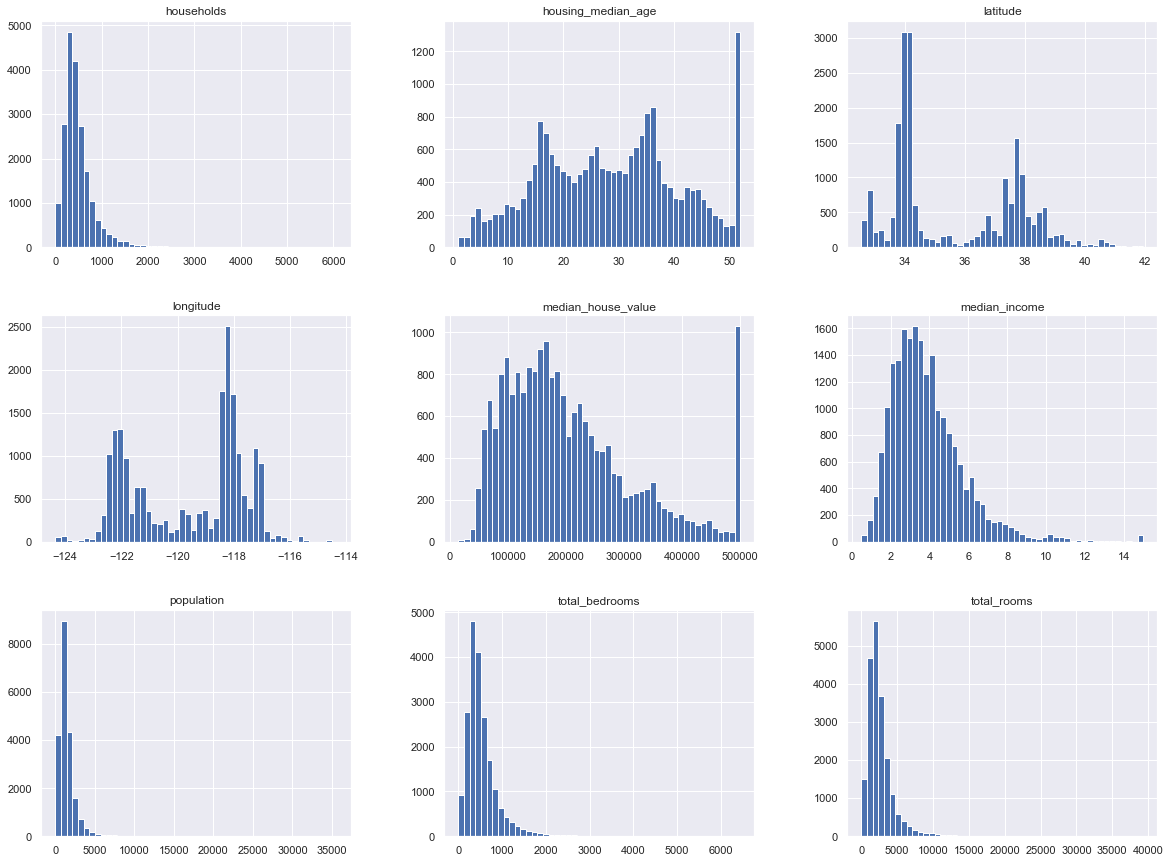

In [10]:
housing.hist(bins = 50, figsize = (20,15))

In [11]:
train_set, test_set = train_test_split(housing, train_size = 0.8, random_state = 42)

In [12]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat'] < 5,5, inplace = True)

In [13]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


(array([ 822.,    0., 6581.,    0.,    0., 7236.,    0., 3639.,    0.,
        2362.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

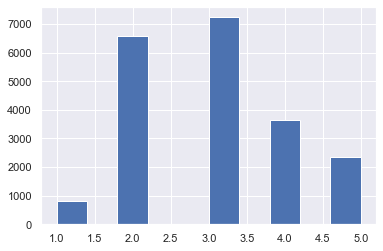

In [14]:
plt.hist(housing['income_cat'])

In [15]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

In [16]:
for train_index, test_index in split.split(housing,housing['income_cat']) :
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
housing_train = strat_train_set.copy()

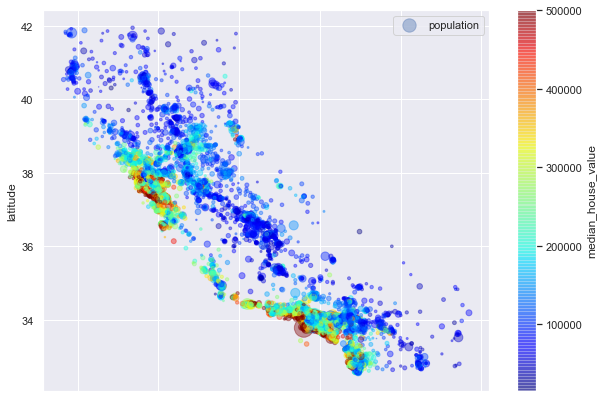

In [18]:
housing_train.plot(kind = 'scatter', x = 'longitude', y='latitude', alpha = 0.4, s= housing['population']/100 , label = 'population', figsize = (10,7), c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True)

In [19]:
corr_matrix = housing_train.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [20]:
housing_train['rooms_per_household'] = housing_train['total_rooms'] / housing_train['households']
housing_train['bedrooms_per_room'] = housing_train['total_bedrooms'] / housing_train['total_rooms']
housing_train['population_per_household'] = housing_train['population'] / housing_train['households']

In [21]:
housing_train.drop('income_cat',axis = 1, inplace = True)

In [23]:
corr_matrix = train_set.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

In [24]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value']

In [25]:
housing.dropna(subset = ['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3.0
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND,4.0
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,2.0
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,3.0
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN,3.0


In [26]:
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_labeled = encoder.fit_transform(housing_cat)
housing_cat_labeled
housing['ocean_proximity'] = housing_cat_labeled
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,0,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,0,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,1,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,0,3.0


In [27]:
hotencoder = OneHotEncoder()
housing_cat_hot = hotencoder.fit_transform(housing_cat_labeled.reshape(-1,1))
housing_cat_hot.toarray()

C:\Users\robin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [28]:
binar_encoder = LabelBinarizer()
binar_encoder.fit_transform(housing_cat)

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [29]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

In [30]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin) :
    def __init__(self, add_bedrooms_per_room = True) :
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None) :
        return self
    def transform(self,X,y=None) :
        rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
        population_per_household = X[:,5] / X[:,household_ix]
        if self.add_bedrooms_per_room :
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else :
            return np.c_[X, rooms_per_household, population_per_household]
        

In [31]:
attr_ader = CombinedAttributesAdder(add_bedrooms_per_room = True)
housing_extra_attribs = attr_ader.transform(housing.values)
pd.DataFrame(housing_extra_attribs)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,0.0,2.0,4.625369,2.094395,0.223852
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,0.0,5.0,6.008850,2.707965,0.159057
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.0,2.0,4.225108,2.025974,0.241291
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,1.0,2.0,5.232295,4.135977,0.200866
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,0.0,3.0,4.505810,3.047847,0.231341
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,1.0,4.0,6.052381,2.728571,0.185681
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,1.0,2.0,4.635659,4.077519,0.245819
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,1.0,3.0,6.346405,2.742484,0.179609
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,0.0,3.0,5.505618,3.808989,0.193878


In [32]:
housing_num_train = housing_train.drop('ocean_proximity', axis = 1)

In [33]:
num_pipeline = Pipeline([('imputer', Imputer(strategy = 'median')), 
                         ('attrribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler())])

housing_num_train_tr = num_pipeline.fit_transform(housing_num_train)
pd.DataFrame(housing_num_train_tr)

C:\Users\robin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,0.688068,-0.312055,0.193805,-0.086499,-0.312055,-0.086499,0.155318
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,1.154794,0.217683,-0.940745,-0.033534,0.217683,-0.033534,-0.836289
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.087217,-0.465315,0.499160,-0.092405,-0.465315,-0.092405,0.422200
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-1.388864,-0.079661,-0.208675,0.089736,-0.079661,0.089736,-0.196453
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,0.410625,-0.357834,0.324937,-0.004194,-0.357834,-0.004194,0.269928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.287029,0.234352,-0.474576,-0.031755,0.234352,-0.031755,-0.428853
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,-0.812371,-0.308114,0.578453,0.084689,-0.308114,0.084689,0.491503
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,-0.943746,0.346934,-0.580895,-0.030554,0.346934,-0.030554,-0.521776
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,0.163433,0.024995,-0.331047,0.061509,0.024995,0.061509,-0.303407


In [34]:
num_attribs = list(housing_num_train)
cat_attribs = ['ocean_proximity']

In [35]:
class DataFrameSelector(BaseEstimator, TransformerMixin) :
    def __init__(self, attribute_names) :
        self.attribute_names = attribute_names
    def fit(self, X, y = None) :
        return self
    def transform(self,X) :
        return X[self.attribute_names].values

In [36]:
num_pipeline = Pipeline([ ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy = 'median')), 
                         ('attrribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler())])

C:\Users\robin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [37]:
class LabelBinarizerXy(LabelBinarizer) :
    def fit(self,X,y=None) :
        return super(LabelBinarizerXy, self).fit(X)
    def fit_transform(self, X , y=None) :
        return super(LabelBinarizerXy, self).fit_transform(X)
 

In [38]:
cat_pipeline = Pipeline([('selector',DataFrameSelector(cat_attribs)), ('cat_encoder',LabelBinarizerXy())])

In [39]:
housing_prepared_num = num_pipeline.fit_transform(housing_train[num_attribs])
pd.DataFrame(housing_prepared_num)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,0.688068,-0.312055,0.193805,-0.086499,-0.312055,-0.086499,0.155318
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,1.154794,0.217683,-0.940745,-0.033534,0.217683,-0.033534,-0.836289
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.087217,-0.465315,0.499160,-0.092405,-0.465315,-0.092405,0.422200
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-1.388864,-0.079661,-0.208675,0.089736,-0.079661,0.089736,-0.196453
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,0.410625,-0.357834,0.324937,-0.004194,-0.357834,-0.004194,0.269928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.287029,0.234352,-0.474576,-0.031755,0.234352,-0.031755,-0.428853
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,-0.812371,-0.308114,0.578453,0.084689,-0.308114,0.084689,0.491503
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,-0.943746,0.346934,-0.580895,-0.030554,0.346934,-0.030554,-0.521776
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,0.163433,0.024995,-0.331047,0.061509,0.024995,0.061509,-0.303407


In [40]:
housing_prepared_cat = cat_pipeline.fit_transform(housing_train[cat_attribs])
pd.DataFrame(housing_prepared_cat)

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
16507,0,1,0,0,0
16508,0,1,0,0,0
16509,0,1,0,0,0
16510,1,0,0,0,0


In [41]:
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [42]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 13 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housing_median_age          16512 non-null float64
total_rooms                 16512 non-null float64
total_bedrooms              16354 non-null float64
population                  16512 non-null float64
households                  16512 non-null float64
median_income               16512 non-null float64
median_house_value          16512 non-null float64
ocean_proximity             16512 non-null object
rooms_per_household         16512 non-null float64
bedrooms_per_room           16354 non-null float64
population_per_household    16512 non-null float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [43]:
housing_prepared = full_pipeline.fit_transform(housing_train)
housing_prepared.shape

(16512, 20)

In [44]:
housing_prepared2 = full_pipeline.fit_transform(housing)
housing_prepared2.shape

KeyError: "['median_house_value', 'population_per_household', 'rooms_per_household', 'bedrooms_per_room'] not in index"

In [45]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.fit_transform(some_data)
some_data_prepared.shape

KeyError: "['median_house_value', 'population_per_household', 'rooms_per_household', 'bedrooms_per_room'] not in index"

In [47]:
pd.DataFrame(housing_prepared)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,0.688068,-0.312055,0.193805,-0.086499,-0.312055,-0.086499,0.155318,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,1.154794,0.217683,-0.940745,-0.033534,0.217683,-0.033534,-0.836289,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.087217,-0.465315,0.499160,-0.092405,-0.465315,-0.092405,0.422200,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-1.388864,-0.079661,-0.208675,0.089736,-0.079661,0.089736,-0.196453,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,0.410625,-0.357834,0.324937,-0.004194,-0.357834,-0.004194,0.269928,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.287029,0.234352,-0.474576,-0.031755,0.234352,-0.031755,-0.428853,0.0,1.0,0.0,0.0,0.0
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,-0.812371,-0.308114,0.578453,0.084689,-0.308114,0.084689,0.491503,0.0,1.0,0.0,0.0,0.0
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,-0.943746,0.346934,-0.580895,-0.030554,0.346934,-0.030554,-0.521776,0.0,1.0,0.0,0.0,0.0
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,0.163433,0.024995,-0.331047,0.061509,0.024995,0.061509,-0.303407,1.0,0.0,0.0,0.0,0.0
